In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate data
X, y = make_classification(n_samples=500000, n_classes=3, n_features=20, n_informative=15, n_redundant=5, flip_y=0.05)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define model
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/50
2735/2735 [==============================] - 7s 2ms/step - loss: 0.2909 - accuracy: 0.9158 - val_loss: 0.2161 - val_accuracy: 0.9487
Epoch 2/50
2735/2735 [==============================] - 6s 2ms/step - loss: 0.2034 - accuracy: 0.9541 - val_loss: 0.1917 - val_accuracy: 0.9585
Epoch 3/50
2735/2735 [==============================] - 6s 2ms/step - loss: 0.1884 - accuracy: 0.9598 - val_loss: 0.1840 - val_accuracy: 0.9610
Epoch 4/50
2735/2735 [==============================] - 6s 2ms/step - loss: 0.1828 - accuracy: 0.9615 - val_loss: 0.1805 - val_accuracy: 0.9623
Epoch 5/50
2735/2735 [==============================] - 6s 2ms/step - loss: 0.1802 - accuracy: 0.9624 - val_loss: 0.1817 - val_accuracy: 0.9617
Epoch 6/50
2735/2735 [==============================] - 6s 2ms/step - loss: 0.1788 - accuracy: 0.9631 - val_loss: 0.1797 - val_accuracy: 0.9625
Epoch 7/50
2735/2735 [==============================] - 6s 2ms/step - loss: 0.1777 - accuracy: 0.9634 - val_loss: 0.1770 - val_accuracy:

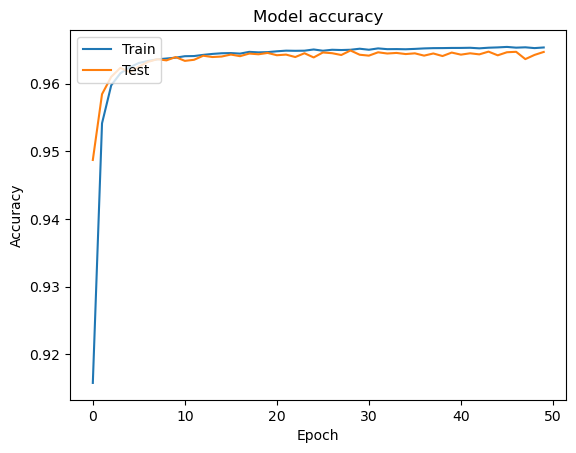

In [30]:
# Plot training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

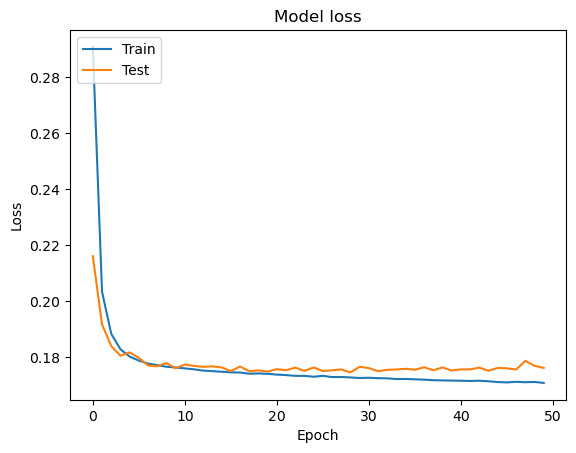

In [31]:
# Plot training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [32]:
# Evaluate model on training and testing set

train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Training loss:', train_loss)
print('Training accuracy:', train_acc)
print('Testing loss:', test_loss)
print('Testing accuracy:', test_acc)

# Generate confusion matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training loss: 0.17017768323421478
Training accuracy: 0.965634286403656
Testing loss: 0.1761493682861328
Testing accuracy: 0.9646933078765869
4688/4688 [==============================] - 7s 1ms/step
[[48211   896   829]
 [  819 48218   859]
 [  912   981 48275]]


In [35]:
# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)

# cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
# sns.heatmap(cm, annot=True, cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')